## Decorators

In [3]:
def decorator(func):

    def wrapper():
        print("Before Calling")
        func()
        print("After Calling")
    
    return wrapper

@decorator
def greet():
    print("hello world")

greet()

Before Calling
hello world
After Calling


In [ ]:
class MathOperations:
    @staticmethod
    def add(x, y): ## no need of self
        return x + y

# Using the static method
res = MathOperations.add(5, 3)
print(res)

class MathOperations:
    def add(self, x, y): # need self
        return x + y

# Without static method
obj = MathOperations()
print(obj.add(3,5))

8
8


### @tool

In [13]:
from langchain_core.tools import tool

@tool
def multiply_tool(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

In [14]:
print(f'Name: {multiply_tool.name}')
print(f'Description: {multiply_tool.description}')
print(f'Args: {multiply_tool.args}')
print(f'Is Return Direct?: {multiply_tool.return_direct}')

Name: multiply_tool
Description: Multiply two numbers.
Args: {'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}
Is Return Direct?: False


In [24]:
from typing import Annotated, List


@tool
def multiply_by_max_tool(
    a: Annotated[str, "scale factor"],
    b: Annotated[List[int], "list of ints over which to take maximum"],
) -> int:
    """Multiply a by the maximum of b."""
    return a * max(b)


# multiply_by_max_tool.args_schema.schema() ## schema is depricated 
multiply_by_max_tool.args_schema.model_json_schema()

{'description': 'Multiply a by the maximum of b.',
 'properties': {'a': {'description': 'scale factor',
   'title': 'A',
   'type': 'string'},
  'b': {'description': 'list of ints over which to take maximum',
   'items': {'type': 'integer'},
   'title': 'B',
   'type': 'array'}},
 'required': ['a', 'b'],
 'title': 'multiply_by_max_tool',
 'type': 'object'}

In [22]:
from langchain_core.tools import StructuredTool

def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

calculator = StructuredTool.from_function(func=multiply)

print(calculator.invoke({"a": 2, "b": 3}))

6


#### The following code snippet demonstrates how to configure the tool using StructuredTool.from_function.



In [5]:
from langchain.pydantic_v1 import BaseModel, Field


class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")


def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


calculator = StructuredTool.from_function(
    func=multiply,
    name="Calculator",
    description="multiply numbers",
    args_schema=CalculatorInput,
    return_direct=True
)

print(calculator.name)
print(calculator.description)
print(calculator.args)

Calculator
multiply numbers
{'a': {'title': 'A', 'description': 'first number', 'type': 'integer'}, 'b': {'title': 'B', 'description': 'second number', 'type': 'integer'}}


### Runnables

![Screenshot from 2025-07-18 18-20-55.png](<attachment:Screenshot from 2025-07-18 18-20-55.png>)
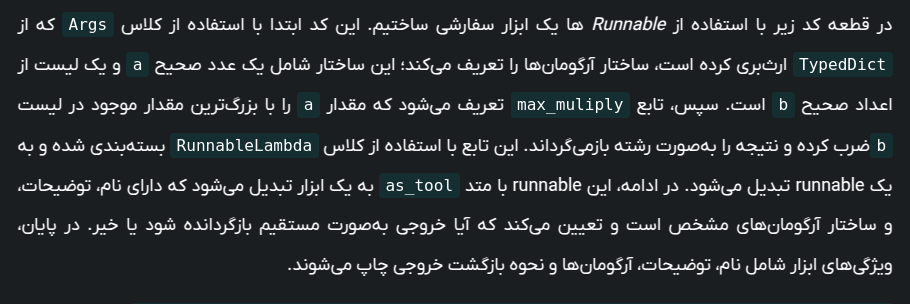

In [25]:
from langchain_core.runnables import RunnableLambda
from typing_extensions import TypedDict

class Args(TypedDict):
    a: int
    b: List[int]

def max_muliply(x: Args) -> str:
    return str(x["a"] * max(x["b"]))

runnable = RunnableLambda(max_muliply)
as_tool = runnable.as_tool(
    name="My tool",
    description="Explanation of when to use tool.",
)

print(f'Name: {as_tool.name}')
print(f'Description: {as_tool.description}')
print(f'Args: {as_tool.args}')
print(f'Is Return Direct?: {as_tool.return_direct}')

Name: My tool
Description: Explanation of when to use tool.
Args: {'a': {'title': 'A', 'type': 'integer'}, 'b': {'items': {'type': 'integer'}, 'title': 'B', 'type': 'array'}}
Is Return Direct?: False


/tmp/ipykernel_52827/3865992964.py:12: LangChainBetaWarning: This API is in beta and may change in the future.
  as_tool = runnable.as_tool(


In [7]:
from typing import Any, Dict


def function(x: Dict[str, Any]) -> str:
    return str(x["a"] * max(x["b"]))

runnable = RunnableLambda(function)

as_tool = runnable.as_tool(
    name="My tool",
    description="Explanation of when to use tool.",
    arg_types={"a": int, "b": List[int]},
)

print(f'Name: {as_tool.name}')
print(f'Description: {as_tool.description}')
print(f'Args: {as_tool.args}')
print(f'Is Return Direct?: {as_tool.return_direct}')

Name: My tool
Description: Explanation of when to use tool.
Args: {'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'array', 'items': {'type': 'integer'}}}
Is Return Direct?: False


### Subclass BaseTool

![Screenshot from 2025-07-18 18-22-18.png](<attachment:Screenshot from 2025-07-18 18-22-18.png>)
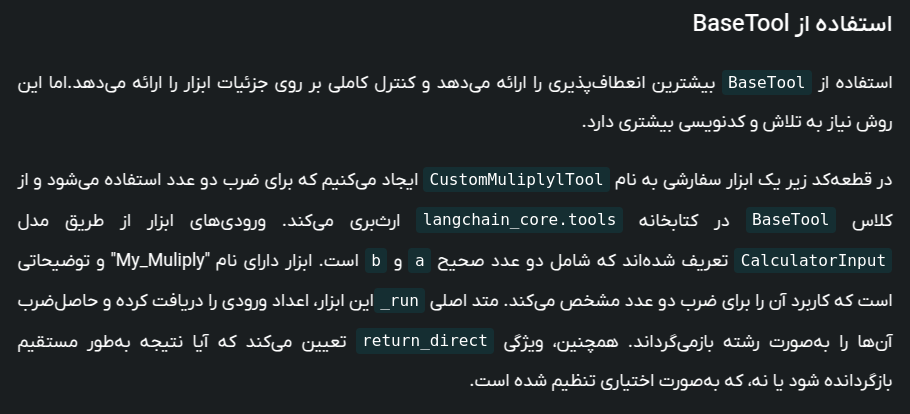

In [8]:
from typing import Optional, Type
from langchain_core.tools import BaseTool


class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")


class CustomMuliplylTool(BaseTool):
    name = "My_Muliply"
    description = "useful for when you need to Multiply two numbers"
    args_schema: Type[BaseModel] = CalculatorInput
    return_direct: Optional[bool] = False

    def _run(self, a: int, b: int) -> str:
        """Use the tool."""
        return a * b    

In [9]:
multiply = CustomMuliplylTool(return_direct = True)

print(multiply.name)
print(multiply.description)
print(multiply.args)
print(multiply.return_direct)

print(multiply.invoke({"a": 2, "b": 3}))

My_Muliply
useful for when you need to Multiply two numbers
{'a': {'title': 'A', 'description': 'first number', 'type': 'integer'}, 'b': {'title': 'B', 'description': 'second number', 'type': 'integer'}}
True
6


## Use Tools in the Chat (LLMs)

In [28]:
import getpass
import os

os.environ["COHERE_API_KEY"] = getpass.getpass()

from langchain_cohere import ChatCohere
from langchain_core.messages import HumanMessage

model = ChatCohere()

In [29]:
# nt9wg84wNjGfVEwC9ysQuAVdEJlT9bDYjtMeMA8g

In [11]:
class CustomAddlTool(BaseTool):
    name = "My_Add"
    description = "useful for when you need to Add two numbers"
    args_schema: Type[BaseModel] = CalculatorInput
    return_direct: Optional[bool] = False

    def _run(self, a: int, b: int) -> str:
        """Use the tool."""
        return a + b

add = CustomAddlTool(return_direct = True)

In [12]:
tools = [add, multiply]
llm_with_tools = model.bind_tools(tools)

messages = [HumanMessage("What is 3 * 12? Also, what is 11 + 49? . Don't do any math yourself, only use tools for math. Respect order of operations")]

ai_msg = llm_with_tools.invoke(messages)

print(ai_msg.content)
print(ai_msg.tool_calls)


I will use the My_Multiply tool to calculate 3 * 12 and the My_Add tool to calculate 11 + 49.
[{'name': 'My_Muliply', 'args': {'a': 3, 'b': 12}, 'id': 'e623a16edf7a41fea4849b5d6cc46089', 'type': 'tool_call'}, {'name': 'My_Add', 'args': {'a': 11, 'b': 49}, 'id': 'bdf9235b3b0448f188d3b3a218c5eba4', 'type': 'tool_call'}]


In [13]:
for tool_call in ai_msg.tool_calls:
    selected_tool = {"My_Add": add, "My_Muliply": multiply}[tool_call["name"]]
    tool_msg = selected_tool.invoke(tool_call)
    messages.append(tool_msg)

messages

[HumanMessage(content="What is 3 * 12? Also, what is 11 + 49? . Don't do any math yourself, only use tools for math. Respect order of operations"),
 ToolMessage(content='36', name='My_Muliply', tool_call_id='2b0267114d6e4365a75ad18780955a03'),
 ToolMessage(content='60', name='My_Add', tool_call_id='0898050b89a346fea2c3f7d2208880ce')]